In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%ls
%cd CNNtention/

CNNtention/  assignment4/  examples/  getting_started.ipynb*
/teamspace/studios/this_studio/CNNtention


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pipeline_template, mlflow, torch, torchvision
from experiment_configs import configs, ExperimentConfig, ModelConfig, DataConfig
from models.resnet_cbam import ResnetCBAM
from models.original_basic_block import OriginalBasicBlock
from skorch.callbacks import LRScheduler
from skorch.dataset import ValidSplit
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.transforms import transforms
mlflow.set_tracking_uri('file:./mlruns')

In [12]:
config={"cbam_resnet20_tuning_reduction_16": lambda: ExperimentConfig(
        "CBAM Attention ResNet20 Tuning W/ Reduction 16",
        DataConfig(name='CIFAR-10',
                   test_size=10000,
                   train_transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ]),
            test_transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])),
        ModelConfig(model=ResnetCBAM(OriginalBasicBlock, [3,3,3], 10, 16),
                    lr=0.005,
                    optimizer=torch.optim.Adam,
                    weight_decay=0.0001,
                    use_reg=True,
                    batch_size=128,
                    max_epochs=64000//(45000 // 128),
                    momentum=0.9,
                    train_split=ValidSplit(cv=0.1),
                    scheduler=LRScheduler(
                        policy=MultiStepLR,
                        milestones=[
                            16000 // (45000 // 128), # == 45
                            32000 // (45000 // 128), # == 91
                            48000 // (45000 // 128) # == 136
                        ],
                        gamma=0.1 # this is the multiplication factor ("divide it by 10")
                    ),
                    log_model=True,
                    use_early_stopping=False,
                    add_test_set_eval=False,
                    )
    )}

=== Model Details ===
ResnetCBAM(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1

2024/12/07 17:08:50 INFO mlflow.tracking.fluent: Experiment with name 'cbam_attention_resnet20_tuning_w/_reduction_16' does not exist. Creating a new experiment.



Experiment ID: 237554920761476281

Run ID: 217673c0f0494151bd477f79543a2341
Model is saved at: ('/teamspace/studios/this_studio/CNNtention', '237554920761476281/217673c0f0494151bd477f79543a2341')
MLflow Tracking URI: file:./mlruns
Using device: CUDA
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/392 [00:00<?, ?it/s]

  epoch    train_err    train_loss    valid_acc    valid_err    valid_loss      lr      dur
-------  -----------  ------------  -----------  -----------  ------------  ------  -------
      1      53.3556        1.6260       0.4574       0.5426        1.4902  0.0050  35.8042


  0%|          | 0/392 [00:00<?, ?it/s]

      2      34.0933        1.1011       0.6452       0.3548        1.0200  0.0050  35.5526


  0%|          | 0/392 [00:00<?, ?it/s]

      3      35.7844        0.8874       0.6308       0.3692        1.0165  0.0050  37.1705


  0%|          | 0/392 [00:00<?, ?it/s]

      4      27.9844        0.7740       0.7052       0.2948        0.8443  0.0050  34.9122


  0%|          | 0/392 [00:00<?, ?it/s]

      5      27.1956        0.6978       0.7210       0.2790        0.8506  0.0050  35.2697


  0%|          | 0/392 [00:00<?, ?it/s]

      6      24.1222        0.6448       0.7344       0.2656        0.7635  0.0050  36.2566


  0%|          | 0/392 [00:00<?, ?it/s]

      7      25.5889        0.5985       0.7280       0.2720        0.7990  0.0050  34.9800


  0%|          | 0/392 [00:00<?, ?it/s]

      8      24.5200        0.5752       0.7306       0.2694        0.7835  0.0050  37.6120


  0%|          | 0/392 [00:00<?, ?it/s]

      9      18.7689        0.5526       0.7896       0.2104        0.5969  0.0050  35.1632


  0%|          | 0/392 [00:00<?, ?it/s]

     10      19.4889        0.5329       0.7768       0.2232        0.6262  0.0050  35.2413


  0%|          | 0/392 [00:00<?, ?it/s]

     11      20.0867        0.5204       0.7758       0.2242        0.6764  0.0050  35.7159


  0%|          | 0/392 [00:00<?, ?it/s]

     12      20.0267        0.5107       0.7862       0.2138        0.6367  0.0050  35.0827


  0%|          | 0/392 [00:00<?, ?it/s]

     13      19.5022        0.4959       0.7798       0.2202        0.6580  0.0050  35.3257


  0%|          | 0/392 [00:00<?, ?it/s]

     14      18.6044        0.4866       0.7980       0.2020        0.5907  0.0050  34.3251


  0%|          | 0/392 [00:00<?, ?it/s]

     15      17.5933        0.4832       0.7998       0.2002        0.5819  0.0050  36.0875


  0%|          | 0/392 [00:00<?, ?it/s]

     16      19.9267        0.4706       0.7804       0.2196        0.6601  0.0050  34.7553


  0%|          | 0/392 [00:00<?, ?it/s]

     17      15.2111        0.4602       0.8196       0.1804        0.5219  0.0050  33.7759


  0%|          | 0/392 [00:00<?, ?it/s]

     18      18.3089        0.4537       0.7910       0.2090        0.6136  0.0050  35.2186


  0%|          | 0/392 [00:00<?, ?it/s]

     19      18.8978        0.4492       0.7836       0.2164        0.6330  0.0050  35.3281


  0%|          | 0/392 [00:00<?, ?it/s]

     20      14.4733        0.4435       0.8352       0.1648        0.4900  0.0050  34.2429


  0%|          | 0/392 [00:00<?, ?it/s]

     21      19.7711        0.4352       0.7802       0.2198        0.6686  0.0050  35.3643


  0%|          | 0/392 [00:00<?, ?it/s]

     22      15.1622        0.4391       0.8206       0.1794        0.5091  0.0050  35.1013


  0%|          | 0/392 [00:00<?, ?it/s]

     23      16.9511        0.4279       0.8024       0.1976        0.5644  0.0050  35.1376


  0%|          | 0/392 [00:00<?, ?it/s]

     24      25.0222        0.4225       0.7204       0.2796        0.8383  0.0050  35.4951


  0%|          | 0/392 [00:00<?, ?it/s]

     25      15.6933        0.4195       0.8164       0.1836        0.5392  0.0050  34.6833


  0%|          | 0/392 [00:00<?, ?it/s]

     26      16.7222        0.4210       0.8020       0.1980        0.5880  0.0050  36.1376


  0%|          | 0/392 [00:00<?, ?it/s]

     27      14.9133        0.4113       0.8286       0.1714        0.5060  0.0050  35.3549


  0%|          | 0/392 [00:00<?, ?it/s]

     28      18.7800        0.4108       0.7900       0.2100        0.5999  0.0050  35.0370


  0%|          | 0/392 [00:00<?, ?it/s]

     29      15.3600        0.4114       0.8214       0.1786        0.5205  0.0050  34.0995


  0%|          | 0/392 [00:00<?, ?it/s]

     30      16.7444        0.4082       0.7976       0.2024        0.5891  0.0050  35.5316


  0%|          | 0/392 [00:00<?, ?it/s]

     31      14.2356        0.4051       0.8220       0.1780        0.5158  0.0050  34.9558


  0%|          | 0/392 [00:00<?, ?it/s]

     32      13.2067        0.3965       0.8342       0.1658        0.4593  0.0050  34.0800


  0%|          | 0/392 [00:00<?, ?it/s]

     33      16.5600        0.3971       0.8038       0.1962        0.5787  0.0050  35.1552


  0%|          | 0/392 [00:00<?, ?it/s]

     34      16.5511        0.3985       0.8104       0.1896        0.5677  0.0050  36.0107


  0%|          | 0/392 [00:00<?, ?it/s]

     35      14.9489        0.3965       0.8190       0.1810        0.5318  0.0050  36.9015


  0%|          | 0/392 [00:00<?, ?it/s]

     36      14.4356        0.3901       0.8250       0.1750        0.5091  0.0050  36.1888


  0%|          | 0/392 [00:00<?, ?it/s]

     37      13.4422        0.3906       0.8334       0.1666        0.4879  0.0050  34.3041


  0%|          | 0/392 [00:00<?, ?it/s]

     38      15.7111        0.3891       0.8192       0.1808        0.5505  0.0050  35.9458


  0%|          | 0/392 [00:00<?, ?it/s]

     39      13.5756        0.3900       0.8382       0.1618        0.4853  0.0050  36.5714


  0%|          | 0/392 [00:00<?, ?it/s]

     40      14.9733        0.3803       0.8160       0.1840        0.5515  0.0050  34.8385


  0%|          | 0/392 [00:00<?, ?it/s]

     41      17.5889        0.3874       0.8016       0.1984        0.5946  0.0050  34.1088


  0%|          | 0/392 [00:00<?, ?it/s]

     42      16.4711        0.3794       0.8006       0.1994        0.6060  0.0050  35.2940


  0%|          | 0/392 [00:00<?, ?it/s]

     43      15.2689        0.3829       0.8150       0.1850        0.5417  0.0050  33.6921


  0%|          | 0/392 [00:00<?, ?it/s]

     44      13.4556        0.3778       0.8396       0.1604        0.4762  0.0050  35.7715


  0%|          | 0/392 [00:00<?, ?it/s]

     45      12.3978        0.3843       0.8528       0.1472        0.4422  0.0050  36.0240


  0%|          | 0/392 [00:00<?, ?it/s]

     46       7.8933        0.2780       0.8864       0.1136        0.3304  0.0005  35.2588


  0%|          | 0/392 [00:00<?, ?it/s]

     47       7.2000        0.2371       0.8810       0.1190        0.3300  0.0005  35.8503


  0%|          | 0/392 [00:00<?, ?it/s]

     48       6.8200        0.2226       0.8968       0.1032        0.3222  0.0005  34.6690


  0%|          | 0/392 [00:00<?, ?it/s]

     49       6.4800        0.2106       0.8990       0.1010        0.3162  0.0005  35.4618


  0%|          | 0/392 [00:00<?, ?it/s]

     50       6.1778        0.2036       0.9010       0.0990        0.2980  0.0005  35.7216


  0%|          | 0/392 [00:00<?, ?it/s]

     51       5.9822        0.1897       0.8934       0.1066        0.3160  0.0005  35.0446


  0%|          | 0/392 [00:00<?, ?it/s]

     52       5.8622        0.1871       0.8960       0.1040        0.3136  0.0005  35.2029


  0%|          | 0/392 [00:00<?, ?it/s]

     53       5.5156        0.1792       0.8892       0.1108        0.3251  0.0005  35.7647


  0%|          | 0/392 [00:00<?, ?it/s]

     54       5.3156        0.1740       0.8872       0.1128        0.3273  0.0005  36.1227


  0%|          | 0/392 [00:00<?, ?it/s]

     55       5.3667        0.1713       0.8914       0.1086        0.3327  0.0005  35.5975


  0%|          | 0/392 [00:00<?, ?it/s]

     56       5.0778        0.1664       0.8944       0.1056        0.3195  0.0005  35.9674


  0%|          | 0/392 [00:00<?, ?it/s]

     57       4.8978        0.1628       0.8954       0.1046        0.3241  0.0005  36.6845


  0%|          | 0/392 [00:00<?, ?it/s]

     58       4.7133        0.1565       0.8990       0.1010        0.3187  0.0005  35.4165


  0%|          | 0/392 [00:00<?, ?it/s]

     59       4.7422        0.1538       0.8894       0.1106        0.3351  0.0005  35.9400


  0%|          | 0/392 [00:00<?, ?it/s]

     60       4.6200        0.1504       0.8924       0.1076        0.3404  0.0005  35.7112


  0%|          | 0/392 [00:00<?, ?it/s]

     61       4.3956        0.1470       0.8946       0.1054        0.3298  0.0005  35.6392


  0%|          | 0/392 [00:00<?, ?it/s]

     62       4.4311        0.1423       0.8980       0.1020        0.3234  0.0005  35.8988


  0%|          | 0/392 [00:00<?, ?it/s]

     63       4.0556        0.1430       0.8942       0.1058        0.3331  0.0005  35.6444


  0%|          | 0/392 [00:00<?, ?it/s]

     64       4.0600        0.1367       0.8978       0.1022        0.3193  0.0005  36.0834


  0%|          | 0/392 [00:00<?, ?it/s]

     65       4.0644        0.1347       0.8980       0.1020        0.3245  0.0005  35.8300


  0%|          | 0/392 [00:00<?, ?it/s]

     66       4.0689        0.1339       0.8940       0.1060        0.3295  0.0005  36.0287


  0%|          | 0/392 [00:00<?, ?it/s]

     67       3.6467        0.1262       0.8966       0.1034        0.3395  0.0005  36.0316


  0%|          | 0/392 [00:00<?, ?it/s]

     68       3.7422        0.1294       0.9018       0.0982        0.3255  0.0005  36.5848


  0%|          | 0/392 [00:00<?, ?it/s]

     69       3.5956        0.1284       0.8972       0.1028        0.3347  0.0005  35.5146


  0%|          | 0/392 [00:00<?, ?it/s]

     70       3.3867        0.1226       0.8988       0.1012        0.3233  0.0005  36.3134


  0%|          | 0/392 [00:00<?, ?it/s]

     71       3.4178        0.1205       0.8962       0.1038        0.3414  0.0005  36.3386


  0%|          | 0/392 [00:00<?, ?it/s]

     72       3.3822        0.1173       0.8928       0.1072        0.3431  0.0005  35.5695


  0%|          | 0/392 [00:00<?, ?it/s]

     73       3.4911        0.1148       0.8902       0.1098        0.3607  0.0005  36.7899


  0%|          | 0/392 [00:00<?, ?it/s]

     74       3.2200        0.1140       0.9018       0.0982        0.3315  0.0005  35.7511


  0%|          | 0/392 [00:00<?, ?it/s]

     75       3.4378        0.1098       0.8910       0.1090        0.3564  0.0005  36.7072


  0%|          | 0/392 [00:00<?, ?it/s]

     76       3.3067        0.1115       0.9012       0.0988        0.3399  0.0005  35.0986


  0%|          | 0/392 [00:00<?, ?it/s]

     77       3.2622        0.1082       0.8924       0.1076        0.3674  0.0005  34.4869


  0%|          | 0/392 [00:00<?, ?it/s]

     78       2.9578        0.1113       0.8966       0.1034        0.3427  0.0005  35.2627


  0%|          | 0/392 [00:00<?, ?it/s]

     79       2.9067        0.1076       0.8996       0.1004        0.3388  0.0005  36.6285


  0%|          | 0/392 [00:00<?, ?it/s]

     80       2.8911        0.1042       0.8974       0.1026        0.3446  0.0005  36.1108


  0%|          | 0/392 [00:00<?, ?it/s]

     81       2.8489        0.0992       0.8970       0.1030        0.3501  0.0005  36.0752


  0%|          | 0/392 [00:00<?, ?it/s]

     82       2.7733        0.1014       0.8978       0.1022        0.3477  0.0005  36.5068


  0%|          | 0/392 [00:00<?, ?it/s]

     83       2.8089        0.1001       0.8962       0.1038        0.3590  0.0005  36.0535


  0%|          | 0/392 [00:00<?, ?it/s]

     84       3.0289        0.0971       0.8952       0.1048        0.3573  0.0005  35.1279


  0%|          | 0/392 [00:00<?, ?it/s]

     85       2.9111        0.1001       0.8976       0.1024        0.3515  0.0005  33.6899


  0%|          | 0/392 [00:00<?, ?it/s]

     86       2.5844        0.0983       0.8972       0.1028        0.3365  0.0005  35.7150


  0%|          | 0/392 [00:00<?, ?it/s]

     87       3.2156        0.0964       0.8950       0.1050        0.3710  0.0005  34.3615


  0%|          | 0/392 [00:00<?, ?it/s]

     88       2.3378        0.0905       0.9000       0.1000        0.3535  0.0005  34.9611


  0%|          | 0/392 [00:00<?, ?it/s]

     89       3.0156        0.0943       0.8960       0.1040        0.3918  0.0005  35.4650


  0%|          | 0/392 [00:00<?, ?it/s]

     90       2.5356        0.0917       0.8988       0.1012        0.3614  0.0005  36.2265


  0%|          | 0/392 [00:00<?, ?it/s]

     91       2.9711        0.0933       0.8948       0.1052        0.3745  0.0005  36.1369


  0%|          | 0/392 [00:00<?, ?it/s]

     92       1.8044        0.0742       0.8982       0.1018        0.3539  0.0001  35.4034


  0%|          | 0/392 [00:00<?, ?it/s]

     93       1.7133        0.0695       0.9002       0.0998        0.3467  0.0001  35.6271


  0%|          | 0/392 [00:00<?, ?it/s]

     94       1.6600        0.0639       0.9010       0.0990        0.3453  0.0001  34.4508


  0%|          | 0/392 [00:00<?, ?it/s]

     95       1.5911        0.0622       0.9054       0.0946        0.3405  0.0001  35.3344


  0%|          | 0/392 [00:00<?, ?it/s]

     96       1.5511        0.0609       0.9054       0.0946        0.3471  0.0001  36.5034


  0%|          | 0/392 [00:00<?, ?it/s]

     97       1.5067        0.0604       0.9068       0.0932        0.3323  0.0001  36.5910


  0%|          | 0/392 [00:00<?, ?it/s]

     98       1.4978        0.0583       0.8960       0.1040        0.3639  0.0001  36.9733


  0%|          | 0/392 [00:00<?, ?it/s]

     99       1.4178        0.0568       0.9014       0.0986        0.3576  0.0001  36.3050


  0%|          | 0/392 [00:00<?, ?it/s]

    100       1.4622        0.0580       0.9002       0.0998        0.3388  0.0001  35.9324


  0%|          | 0/392 [00:00<?, ?it/s]

    101       1.2467        0.0585       0.9114       0.0886        0.3280  0.0001  35.7869


  0%|          | 0/392 [00:00<?, ?it/s]

    102       1.3333        0.0568       0.8974       0.1026        0.3743  0.0001  34.5644


  0%|          | 0/392 [00:00<?, ?it/s]

    103       1.2667        0.0534       0.9016       0.0984        0.3516  0.0001  35.9321


  0%|          | 0/392 [00:00<?, ?it/s]

    104       1.2778        0.0540       0.9014       0.0986        0.3581  0.0001  34.8259


  0%|          | 0/392 [00:00<?, ?it/s]

    105       1.3156        0.0524       0.9048       0.0952        0.3606  0.0001  35.3009


  0%|          | 0/392 [00:00<?, ?it/s]

    106       1.3600        0.0538       0.9078       0.0922        0.3509  0.0001  34.0259


  0%|          | 0/392 [00:00<?, ?it/s]

    107       1.2289        0.0548       0.9026       0.0974        0.3600  0.0001  36.6286


  0%|          | 0/392 [00:00<?, ?it/s]

    108       1.1844        0.0519       0.9032       0.0968        0.3542  0.0001  36.7429


  0%|          | 0/392 [00:00<?, ?it/s]

    109       1.2711        0.0515       0.9046       0.0954        0.3526  0.0001  34.7840


  0%|          | 0/392 [00:00<?, ?it/s]

    110       1.1733        0.0511       0.9028       0.0972        0.3400  0.0001  35.3826


  0%|          | 0/392 [00:00<?, ?it/s]

    111       1.1933        0.0516       0.9018       0.0982        0.3655  0.0001  35.7667


  0%|          | 0/392 [00:00<?, ?it/s]

    112       1.1511        0.0492       0.9008       0.0992        0.3658  0.0001  35.9547


  0%|          | 0/392 [00:00<?, ?it/s]

    113       1.1644        0.0502       0.8994       0.1006        0.3622  0.0001  36.2328


  0%|          | 0/392 [00:00<?, ?it/s]

    114       1.0133        0.0464       0.9020       0.0980        0.3599  0.0001  35.1763


  0%|          | 0/392 [00:00<?, ?it/s]

    115       1.2156        0.0467       0.9006       0.0994        0.3630  0.0001  35.3778


  0%|          | 0/392 [00:00<?, ?it/s]

    116       1.1067        0.0474       0.9002       0.0998        0.3998  0.0001  36.8895


  0%|          | 0/392 [00:00<?, ?it/s]

    117       1.0867        0.0463       0.9072       0.0928        0.3773  0.0001  35.6002


  0%|          | 0/392 [00:00<?, ?it/s]

    118       1.1067        0.0464       0.9008       0.0992        0.3711  0.0001  36.1932


  0%|          | 0/392 [00:00<?, ?it/s]

    119       1.0111        0.0467       0.9052       0.0948        0.3876  0.0001  35.3795


  0%|          | 0/392 [00:00<?, ?it/s]

    120       1.1244        0.0458       0.9022       0.0978        0.3963  0.0001  36.1372


  0%|          | 0/392 [00:00<?, ?it/s]

    121       1.0222        0.0435       0.9030       0.0970        0.4039  0.0001  36.2883


  0%|          | 0/392 [00:00<?, ?it/s]

    122       1.0933        0.0465       0.8990       0.1010        0.4000  0.0001  36.2527


  0%|          | 0/392 [00:00<?, ?it/s]

    123       1.0000        0.0456       0.9060       0.0940        0.3927  0.0001  35.9962


  0%|          | 0/392 [00:00<?, ?it/s]

    124       1.0067        0.0441       0.9036       0.0964        0.3945  0.0001  36.4306


  0%|          | 0/392 [00:00<?, ?it/s]

    125       0.9844        0.0421       0.8976       0.1024        0.4171  0.0001  35.7841


  0%|          | 0/392 [00:00<?, ?it/s]

    126       1.0467        0.0421       0.9008       0.0992        0.4130  0.0001  36.5421


  0%|          | 0/392 [00:00<?, ?it/s]

    127       0.8844        0.0430       0.9100       0.0900        0.3889  0.0001  34.6723


  0%|          | 0/392 [00:00<?, ?it/s]

    128       0.9289        0.0433       0.9036       0.0964        0.4071  0.0001  34.7737


  0%|          | 0/392 [00:00<?, ?it/s]

    129       0.9844        0.0409       0.9044       0.0956        0.4127  0.0001  35.4164


  0%|          | 0/392 [00:00<?, ?it/s]

    130       0.9467        0.0401       0.9012       0.0988        0.4215  0.0001  35.5405


  0%|          | 0/392 [00:00<?, ?it/s]

    131       0.8933        0.0414       0.9040       0.0960        0.4280  0.0001  35.8734


  0%|          | 0/392 [00:00<?, ?it/s]

    132       0.9667        0.0388       0.9008       0.0992        0.4390  0.0001  34.6327


  0%|          | 0/392 [00:00<?, ?it/s]

    133       0.9333        0.0396       0.9042       0.0958        0.4180  0.0001  35.1930


  0%|          | 0/392 [00:00<?, ?it/s]

    134       0.8956        0.0405       0.9030       0.0970        0.4240  0.0001  34.8022


  0%|          | 0/392 [00:00<?, ?it/s]

    135       0.9178        0.0390       0.8978       0.1022        0.4457  0.0001  34.9904


  0%|          | 0/392 [00:00<?, ?it/s]

    136       0.8778        0.0384       0.8992       0.1008        0.4266  0.0001  34.5063


  0%|          | 0/392 [00:00<?, ?it/s]

    137       0.8667        0.0378       0.8984       0.1016        0.4547  0.0000  35.3648


  0%|          | 0/392 [00:00<?, ?it/s]

    138       0.8711        0.0389       0.8992       0.1008        0.4335  0.0000  35.7972


  0%|          | 0/392 [00:00<?, ?it/s]

    139       0.9156        0.0373       0.9034       0.0966        0.4411  0.0000  35.3476


  0%|          | 0/392 [00:00<?, ?it/s]

    140       0.8533        0.0380       0.9056       0.0944        0.4003  0.0000  34.9968


  0%|          | 0/392 [00:00<?, ?it/s]

    141       0.8533        0.0371       0.9032       0.0968        0.4188  0.0000  36.7064


  0%|          | 0/392 [00:00<?, ?it/s]

    142       0.8444        0.0362       0.9044       0.0956        0.4104  0.0000  34.3599


  0%|          | 0/392 [00:00<?, ?it/s]

    143       0.9289        0.0369       0.9010       0.0990        0.4335  0.0000  36.2895


  0%|          | 0/392 [00:00<?, ?it/s]

    144       0.8200        0.0360       0.9076       0.0924        0.4279  0.0000  36.0550


  0%|          | 0/392 [00:00<?, ?it/s]

    145       0.8867        0.0380       0.9074       0.0926        0.4332  0.0000  36.0874


  0%|          | 0/392 [00:00<?, ?it/s]

    146       0.8400        0.0367       0.9008       0.0992        0.4198  0.0000  36.3042


  0%|          | 0/392 [00:00<?, ?it/s]

    147       0.8000        0.0367       0.9052       0.0948        0.4190  0.0000  36.1231


  0%|          | 0/392 [00:00<?, ?it/s]

    148       0.8178        0.0375       0.8968       0.1032        0.4553  0.0000  36.0035


  0%|          | 0/392 [00:00<?, ?it/s]

    149       0.8333        0.0359       0.9032       0.0968        0.4328  0.0000  35.9361


  0%|          | 0/392 [00:00<?, ?it/s]

    150       0.9022        0.0370       0.9036       0.0964        0.4236  0.0000  36.2036


  0%|          | 0/392 [00:00<?, ?it/s]

    151       0.8556        0.0352       0.9048       0.0952        0.4310  0.0000  35.3567


  0%|          | 0/392 [00:00<?, ?it/s]

    152       0.7378        0.0347       0.9018       0.0982        0.4259  0.0000  34.8419


  0%|          | 0/392 [00:00<?, ?it/s]

    153       0.7889        0.0377       0.9016       0.0984        0.4341  0.0000  35.2004


  0%|          | 0/392 [00:00<?, ?it/s]

    154       0.8556        0.0369       0.8986       0.1014        0.4302  0.0000  36.0419


  0%|          | 0/392 [00:00<?, ?it/s]

    155       0.8600        0.0350       0.9010       0.0990        0.4330  0.0000  36.0851


  0%|          | 0/392 [00:00<?, ?it/s]

    156       0.8333        0.0346       0.9010       0.0990        0.4347  0.0000  34.7516


  0%|          | 0/392 [00:00<?, ?it/s]

    157       0.7289        0.0377       0.9012       0.0988        0.4162  0.0000  35.8657


  0%|          | 0/392 [00:00<?, ?it/s]

    158       0.8311        0.0346       0.9012       0.0988        0.4336  0.0000  35.5013


  0%|          | 0/392 [00:00<?, ?it/s]

    159       0.7911        0.0340       0.8972       0.1028        0.4386  0.0000  36.5409


  0%|          | 0/392 [00:00<?, ?it/s]

    160       0.8156        0.0362       0.9026       0.0974        0.4256  0.0000  34.5967


  0%|          | 0/392 [00:00<?, ?it/s]

    161       0.8844        0.0358       0.9000       0.1000        0.4453  0.0000  35.6129


  0%|          | 0/392 [00:00<?, ?it/s]

    162       0.6933        0.0343       0.9032       0.0968        0.4367  0.0000  36.3780


  0%|          | 0/392 [00:00<?, ?it/s]

    163       0.8378        0.0369       0.9028       0.0972        0.4381  0.0000  35.7979


  0%|          | 0/392 [00:00<?, ?it/s]

    164       0.8333        0.0365       0.9008       0.0992        0.4369  0.0000  35.3899


  0%|          | 0/392 [00:00<?, ?it/s]

    165       0.8111        0.0355       0.9014       0.0986        0.4386  0.0000  35.5136


  0%|          | 0/392 [00:00<?, ?it/s]

    166       0.8311        0.0364       0.8984       0.1016        0.4348  0.0000  35.5963


  0%|          | 0/392 [00:00<?, ?it/s]

    167       0.8044        0.0358       0.9024       0.0976        0.4313  0.0000  34.5453


  0%|          | 0/392 [00:00<?, ?it/s]

    168       0.8000        0.0356       0.9026       0.0974        0.4266  0.0000  34.8950


  0%|          | 0/392 [00:00<?, ?it/s]

    169       0.7556        0.0345       0.9008       0.0992        0.4376  0.0000  34.6105


  0%|          | 0/392 [00:00<?, ?it/s]

    170       0.7578        0.0354       0.9028       0.0972        0.4391  0.0000  35.2392


  0%|          | 0/392 [00:00<?, ?it/s]

    171       0.7844        0.0348       0.9048       0.0952        0.4442  0.0000  36.0115


  0%|          | 0/392 [00:00<?, ?it/s]

    172       0.7444        0.0356       0.9042       0.0958        0.4128  0.0000  35.8164


  0%|          | 0/392 [00:00<?, ?it/s]

    173       0.7756        0.0361       0.9040       0.0960        0.4291  0.0000  35.7191


  0%|          | 0/392 [00:00<?, ?it/s]

    174       0.7578        0.0357       0.9054       0.0946        0.4150  0.0000  35.1152


  0%|          | 0/392 [00:00<?, ?it/s]

    175       0.7422        0.0343       0.9020       0.0980        0.4353  0.0000  35.7761


  0%|          | 0/392 [00:00<?, ?it/s]

    176       0.6889        0.0364       0.9012       0.0988        0.4532  0.0000  35.8355


  0%|          | 0/392 [00:00<?, ?it/s]

    177       0.8178        0.0364       0.8998       0.1002        0.4449  0.0000  37.1165


  0%|          | 0/392 [00:00<?, ?it/s]

    178       0.7867        0.0350       0.9026       0.0974        0.4219  0.0000  36.4115


  0%|          | 0/392 [00:00<?, ?it/s]

    179       0.7644        0.0352       0.9020       0.0980        0.4280  0.0000  36.6588


  0%|          | 0/392 [00:00<?, ?it/s]

    180       0.8444        0.0367       0.9036       0.0964        0.4203  0.0000  36.5612


  0%|          | 0/392 [00:00<?, ?it/s]

    181       0.7778        0.0344       0.9078       0.0922        0.4095  0.0000  35.5615


  0%|          | 0/392 [00:00<?, ?it/s]

    182       0.8311        0.0360       0.9032       0.0968        0.4222  0.0000  32.4756
Test set accuracy: 0.9038
Test set error: 9.619999999999996


FileNotFoundError: [Errno 2] No such file or directory: '/teamspace/studios/this_studio/CNNtention/plots/cbam_attention_resnet20_tuning_w/_reduction_16_train_val_loss.png'

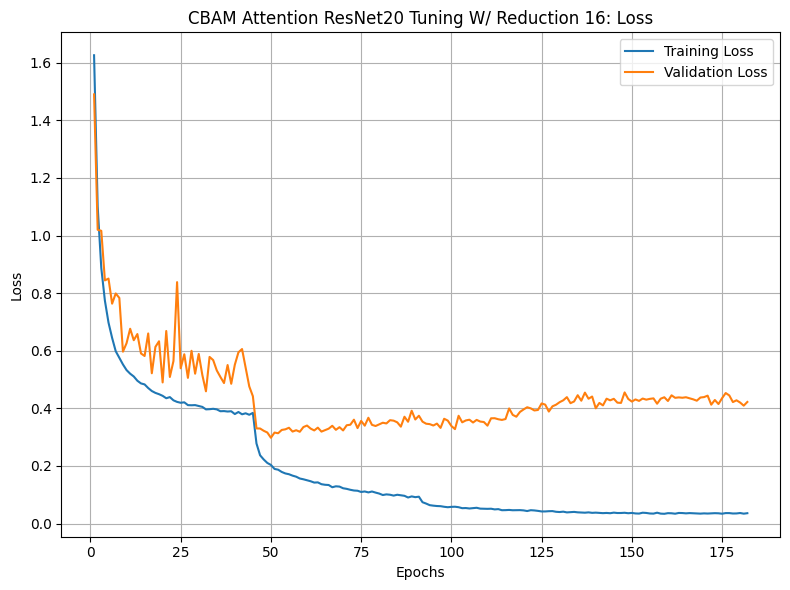

In [13]:
pipeline_template.main('cbam_resnet20_tuning_reduction_16', True, config)
# pipeline_template.main('debug_config')